In [58]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [53]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    #dt=1/(np.abs(np.round(x[1])-np.round(x[0])))
    #if f>dt:
        #return "Frecuencia mayor al limite de Nyquist"    PREGUNTAR!!
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [56]:
t_max=20
N=200
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t)
y=f(t)
y_2=f(t)

In [57]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(1.762749271162831-0.08309250769127503j)

## PUNTO 2 c

In [120]:
f_0=1/(t[1]-t[0])
frecuencias=np.linspace(0,f_0,len(t))
F=np.zeros_like(frecuencias)
for i,f in enumerate(frecuencias):
    F[i]=abs(Transformada_Fourier(t,y,f))
indice_altura_max=np.where(F==np.max(F))
indice_altura_max_2=np.where(F==F.sort()[1])
indice_altura_max_2

TypeError: 'NoneType' object is not subscriptable

In [131]:
np.sort(F)[-2]==np.sort(F)[-1]

False

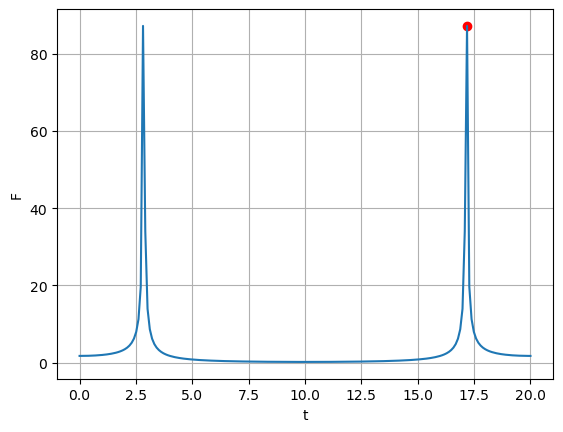

In [114]:
plt.plot(t,F)
plt.xlabel("t")
plt.ylabel("F")
plt.scatter(t[indice_altura_max],F[indice_altura_max],color="r")
plt.scatter()
plt.grid()

## PUNTO 2 D

In [96]:
##Ruido
ruido=np.random.normal(0.01,0.3,t.shape[0])
t_new=ruido+t

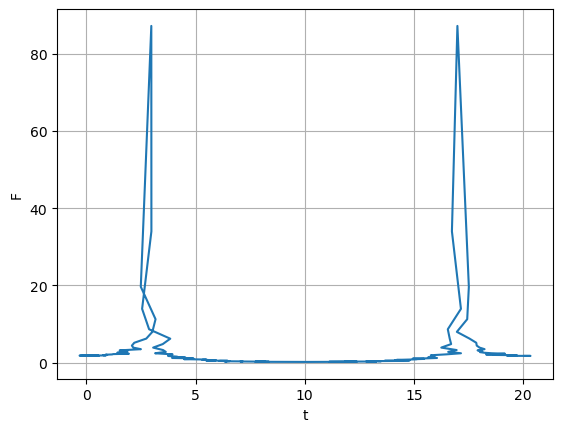

In [97]:
plt.plot(t_new,F)
plt.xlabel("t")
plt.ylabel("F")
plt.grid()